In [2]:
!pip install yfinance
import math
import numpy as np
import yfinance as yf
# !pip install pandas
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
# import pandas as pd #data read
import matplotlib.pyplot as plt #graph plot
# import pandas_datareader as dr #data read
from sklearn.preprocessing import MinMaxScaler #min max
plt.style.use('seaborn')

In [3]:
stock = yf.Ticker('AAPL')
df = stock.history(period="max", auto_adjust=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0
2022-04-19,165.020004,167.820007,163.910004,167.399994,67723800,0.0,0.0
2022-04-20,168.759995,168.880005,166.100006,167.229996,67929800,0.0,0.0


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900,0.0,0.0
2022-04-19,165.020004,167.820007,163.910004,167.399994,67723800,0.0,0.0
2022-04-20,168.759995,168.880005,166.100006,167.229996,67929800,0.0,0.0
2022-04-21,168.910004,171.529999,165.910004,166.419998,87227800,0.0,0.0
2022-04-22,166.460007,167.869995,161.500000,161.789993,84775200,0.0,0.0


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1,1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
2,1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
3,1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
4,1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


In [6]:
df=df.drop(['Dividends','Stock Splits'],axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600
1,1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800
2,1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000
3,1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600
4,1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600


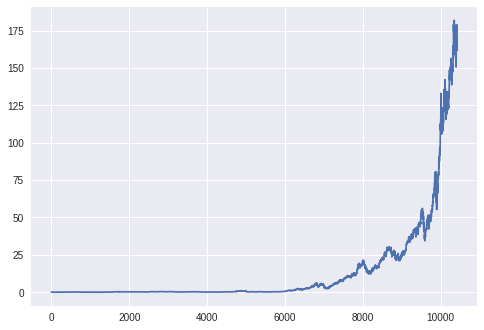

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10424    169.151678
10425    169.213631
10426    169.268592
10427    169.366687
10428    169.384226
Name: Close, Length: 10429, dtype: float64

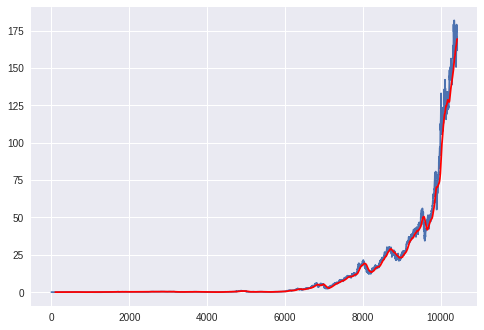

In [9]:
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10424    158.239100
10425    158.379253
10426    158.508300
10427    158.620600
10428    158.716372
Name: Close, Length: 10429, dtype: float64

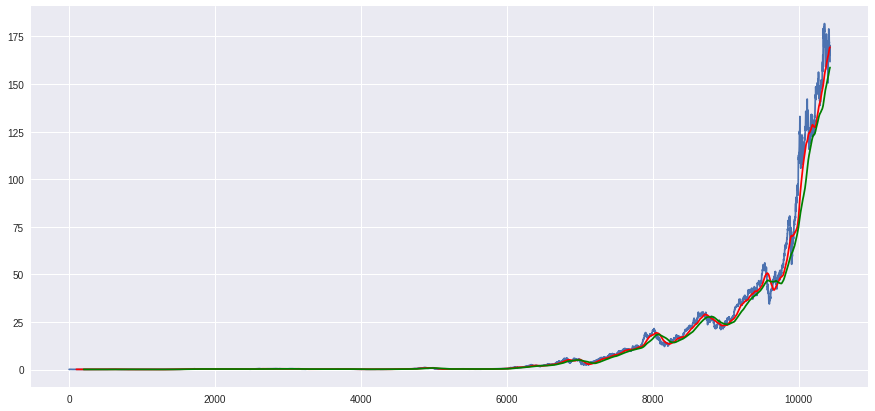

In [11]:
plt.figure(figsize=(15,7))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(10429, 6)

In [13]:
# splitting and testing
data_training=df['Close'][0:int(len(df)*0.70)]
data_testing=df['Close'][int(len(df)*0.70):int(len(df))]
print(data_training.shape)
print(data_testing.shape)

(7300,)
(3129,)


In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training.values.reshape(-1,1))
data_training_array

array([[0.00986213],
       [0.00902876],
       [0.00791748],
       ...,
       [0.97740741],
       [0.98938541],
       [1.        ]])

In [15]:
x_train=[]         #previous data
y_train=[]         #predicted data value

for i in range(100,data_training.shape[0]):             #101th day dependent on previous 100 days
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [54]:
x_train.shape

(7200, 100, 1)

In [55]:
# ML Model
from keras.layers import Dense, Dropout, LSTM # Keras models offer a simple, user-friendly way to define a neural network. It is a neural network API for Python that is tightly integrated with TensorFlow, which is used to build machine learning models
# dense layer is a classic fully connected neural network layer : each input node is connected to each output node.
# dropout layer is similar except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting.
# Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.
from keras.models import Sequential  #Sequential model is a linear stack of layers.
import tensorflow as tf

In [56]:
model = Sequential()  
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))  #layer1
#activation function of a node defines the output of that node given an input or set of inputs.      
#RELU: most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value x it returns that value back.
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))   # layer 2
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))   # layer 3
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))  #layer 4
model.add(Dropout(0.5))

model.add(Dense(units = 1))    #dense layer combines all

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [58]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Optimizer that implements the Adam algorithm. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# Mean squared error: Difference between our model's predictions and the ground truth, square it, and average it out across the whole dataset.
model.fit(x_train, y_train, epochs = 1)

225/225 [==============================] - 52s 215ms/step - loss: 0.0057


In [59]:
model.save('keras_model.h5')

In [60]:
data_testing.head()

7300    6.330312
7301    6.298508
7302    6.131839
7303    6.113798
7304    6.296062
Name: Close, dtype: float64

In [61]:
past_100_days=data_training.tail(100)

In [62]:
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

0    4.355989
1    4.341617
2    4.355682
3    4.367916
4    4.281982
Name: Close, dtype: float64

In [71]:
input_data=scaler.fit_transform(final_df.values.reshape(-1,1))
input_data

array([[0.00121198],
       [0.00113106],
       [0.00121024],
       ...,
       [0.91810071],
       [0.91354088],
       [0.88747657]])

In [64]:
input_data.shape

(3229, 1)

In [80]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [81]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3129, 100, 1)
(3129,)


In [83]:
#Making predictions

y_predicted = model.predict(x_test)

In [84]:
y_predicted.shape

(3129, 1)

In [85]:
y_test

array([0.0123263 , 0.01214726, 0.01120901, ..., 0.91810071, 0.91354088,
       0.88747657])

In [86]:
y_predicted

array([[0.02251566],
       [0.02251566],
       [0.02251567],
       ...,
       [0.8668557 ],
       [0.86746573],
       [0.86763555]], dtype=float32)

In [87]:
scaler.scale_

array([0.00562944])

In [89]:
scale_factor=1/0.00562944
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

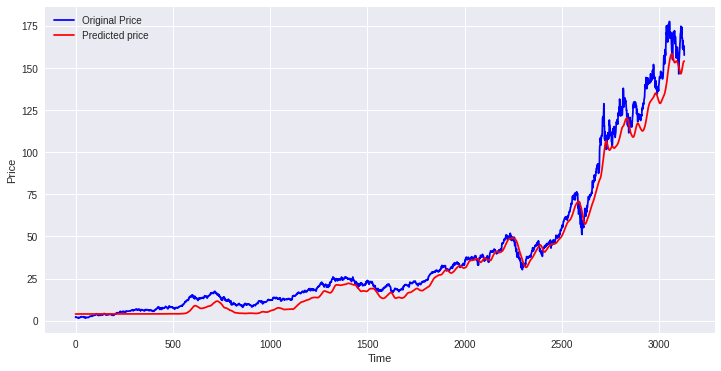

In [90]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()